# Análise Exploratória de Dados da Construção Civil
## Dados do CNO Cadastro Nacional de Obras
<br>
Os Dados foram extraídos de 
[Site Oficial Dados Gov.Br](https://dados.gov.br/dados/conjuntos-dados/cadastro-nacional-de-obras-cno).

***
### Contextualizando Situação Problema:
Uma empresa varejista de Construção civil contratou um Cientista de Dados para fazer uma análise exploratória
a respeito de como é o momento de obras no país a fim de intensificar seus investimentos com estratégia fundamentada em dados.
Com este estudo a empresa espera revelar:
- quais são as cidades e estados com mais obras em andamento
##### - essas cidades e estados estão em crescimento ou ja stagnou?
- quais são as cidades e estados que estão com maior número de crescimento em obras
- quais as cidades e estados com obras de maior m²
- quanto representa (em percentual) cada situação de obras, como um todo. 

Para isso, devemos realizar uma análise exploratória que será dividida em 6 etapas:<br>
1 - Carregamento do DataFrame<br>
2 - Análise do DataFrame, tipos dados etc<br>
3 - Limpeza do DataFrame<br>
4 - Parametrização das variáveis<br>
5 - Responder os questionários por meio de vizualização de dados<br>
6 - Conclusões e insights gerados.<br>

***

### Legendas:
#### Qualificação do responsável
Qualificação do responsável pela obra <br>
0070 - Proprietário do Imóvel <br>
0057 - Dono da Obra <br>
0064 - Incorporador de Construção Civil <br>
0053 - Pessoa Jurídica Construtora <br>
0111 - Sociedade Líder de Consórcio <br>
0109 - Consórcio <br>
0110 - Construção em nome coletivo <br>
#### Situação
Situação da obra
01 - NULA <br>
02 - ATIVA <br>
03 – SUSPENSA <br>
14 - PARALISADA <br>
15 - ENCERRADA <br>

### Etapa 1: Iniciando o carregamento dos dados.
 Detalhe importante:
O DataSet original foi baixado em planilha '.csv' . Devido ao tamanho do arquivo, decidimos converter o tipo de arquivo para '.parquet'.

In [2]:
# Importação das Bibliotecas que serão utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Inserindo o caminho para o arquivo em variável separada, fica melhor a manipulação e mais legível o código
path_to_file = r'C:\Workspace\CURSO ADA TECH\MODULO II - tecnicas de programação\projeto_ccvil\data_cno\cno.parquet'

# Criando o DataFrame que iremos trabalhar.
df_cno = pd.read_parquet(path_to_file)

### Etapa 2: Análise do DataSet e tipos de dados

In [3]:
# Carregando as primeiras linhas do DataFrame
df_cno.head()

,CNO,Código do Pais,Nome do pais,Data de início,Data de inicio da responsabilidade,Data de registro,CNO vinculado,CEP,NI do responsável,Qualificação do responsavel,...,Bairro,Estado,Caixa Postal,Complemento,Unidade de medida,Área total,Situação,Data da situação,Nome empresarial,Código de localização
0,10010092278,105,BRASIL,1992-02-20,1992-02-20,2022-05-17,NaN,71215207,2.688984e+12,57,...,ZONA INDUSTRIAL (GUARA),DF,NaN,LOTES 3/5,m2,412.00,2,2002-11-30,M H TECNOLOGIA LTDA,None
1,10010144970,105,BRASIL,1997-12-29,1997-12-29,2023-05-22,NaN,73310303,3.677093e+13,70,...,SETOR COMERCIAL CENTRAL (PLANALTINA),DF,NaN,PLAZA SHOPPING,m2,3008.56,15,2023-05-19,SANTA PAULA ENGENHARIA E COMERCIO LTDA,98PW75So+br
2,10010199274,105,BRASIL,1993-12-10,1993-12-10,2022-12-13,NaN,70390140,5.328120e+11,70,...,ASA SUL,DF,NaN,MODULO A,m2,11785.60,2,1997-12-23,CENTRO OESTE - INSTITUTO DE EDUCACAO LTDA,64JG+96
3,10010251669,105,BRASIL,2017-09-14,2017-09-14,2020-09-04,NaN,71530065,NaN,70,...,SETOR DE HABITACOES,DF,NaN,None,m2,24.21,15,2019-11-01,None,None
4,10010287967,105,BRASIL,1992-05-01,1992-05-01,2019-06-24,NaN,71675320,NaN,70,...,SETOR DE HABITACOES INDIVIDUAIS SUL,DF,NaN,None,m2,381.29,2,1992-05-01,None,None


In [4]:
# Carregando os tipos de dados de cada coluna do DataFrame
df_cno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219861 entries, 0 to 2219860
Data columns (total 26 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   CNO                                 int64  
 1   Código do Pais                      int64  
 2   Nome do pais                        object 
 3   Data de início                      object 
 4   Data de inicio da responsabilidade  object 
 5   Data de registro                    object 
 6   CNO vinculado                       float64
 7   CEP                                 object 
 8   NI do responsável                   float64
 9   Qualificação do responsavel         int64  
 10  Nome                                object 
 11  Código do municipio                 object 
 12  Nome do município                   object 
 13  Tipo de logradouro                  object 
 14  Logradouro                          object 
 15  Número do logradouro                object 
 16  

In [5]:
# Carregando os dados faltantes
df_cno.isnull().sum()

CNO                                         0
Código do Pais                              0
Nome do pais                                0
Data de início                              0
Data de inicio da responsabilidade          0
Data de registro                            0
CNO vinculado                         2219627
CEP                                         0
NI do responsável                     1436784
Qualificação do responsavel                 0
Nome                                    20084
Código do municipio                         0
Nome do município                           0
Tipo de logradouro                          0
Logradouro                                  5
Número do logradouro                      166
Bairro                                     81
Estado                                      0
Caixa Postal                          2219857
Complemento                           1238472
Unidade de medida                           0
Área total                        

In [6]:
# Realizando uma análise dos dados categóricos
df_cno.describe(include=['object','bool'])

,Nome do pais,Data de início,Data de inicio da responsabilidade,Data de registro,CEP,Nome,Código do municipio,Nome do município,Tipo de logradouro,Logradouro,Número do logradouro,Bairro,Estado,Complemento,Unidade de medida,Data da situação,Nome empresarial,Código de localização
count,2219861,2219861,2219861,2219861,2219861,2199777,2219861,2219861,2219861,2219856,2219695,2219780,2219861,981389,2219861,2219861,783077,697426
unique,4,21366,21366,1859,369195,1441280,5562,5292,45,855147,68543,192184,33,596900,6,18799,177912,544598
top,BRASIL,2015-01-01,2015-01-01,2021-10-14,59575000,CONGREGACAO CRISTA NO BRASIL,7107,SÃO PAULO,RUA,BRASIL,SN,CENTRO,SP,CASA,m2,2021-10-10,CONGREGACAO CRISTA NO BRASIL,00000000+00
freq,2219855,5495,5494,4060,6495,2745,44319,44319,1731351,3840,168738,227671,665169,37200,2103801,12255,3409,20049


### Etapa 3:  Limpeza do DataFrame

In [7]:
# Excluindo duplicatas
df_cno = df_cno.drop_duplicates()

In [8]:
# Verificando se existem dados de outros países, pois quero examinar apenas os dados Brasil.
df_cno['Nome do pais'].value_counts()

Nome do pais
BRASIL        2219855
A DESIGNAR          3
ARGENTINA           2
AUSTRIA             1
Name: count, dtype: int64

In [9]:
# Identifiquei que possuem alguns mínimos dados classificados como outro pais.
# diante disso, vou excluir estes dados do DataFrame.
exclude_values = ['A DESIGNAR', 'ARGENTINA', 'AUSTRIA']

df_cno= df_cno[~df_cno['Nome do pais'].isin(exclude_values)]

In [10]:
# Verificando os dados atrelados a cada Estado do Brasil
df_cno['Estado'].value_counts()

Estado
SP    665168
MG    301412
RS    248582
PR    236237
SC    146697
GO    121581
MT     61795
CE     53121
MS     48424
BA     36825
RN     33962
PB     31284
RJ     28786
PE     28145
ES     23736
PI     21023
PA     20982
MA     17169
SE     16641
RO     16277
AL     15712
TO     14390
DF     11654
AM      6392
RR      5280
AC      5158
AP      3420
EX         2
Name: count, dtype: int64

In [11]:
# Excluindo dados atrelados ao estado 'EX'
df_cno = df_cno[~df_cno['Estado'].isin(['EX'])]

In [12]:
# Determinando os nomes de cada código utilizado para identificar a situação da obra
situation_mapping = {
    1: 'NULA',
    2: 'ATIVA',
    3: 'SUSPENSA',
    14: 'PARALISADA',
    15: 'ENCERRADA',    
} 

# Contagem de dados definido para cada tipo de situação
df_cno['Situação'].replace(situation_mapping).value_counts()

Situação
ENCERRADA     1336956
ATIVA          797537
PARALISADA      46575
NULA            32456
SUSPENSA         6329
Name: count, dtype: int64

In [13]:
# Verificando se há dados nulos no DataFrame
df_cno.isnull().sum()

CNO                                         0
Código do Pais                              0
Nome do pais                                0
Data de início                              0
Data de inicio da responsabilidade          0
Data de registro                            0
CNO vinculado                         2219619
CEP                                         0
NI do responsável                     1436781
Qualificação do responsavel                 0
Nome                                    20084
Código do municipio                         0
Nome do município                           0
Tipo de logradouro                          0
Logradouro                                  5
Número do logradouro                      166
Bairro                                     80
Estado                                      0
Caixa Postal                          2219853
Complemento                           1238468
Unidade de medida                           0
Área total                        

In [14]:
# limpando dados do tipo numerico do DataFrame que estão como nulos

# Mascara para filtragem de dados numéricos encontrados como nulo
mascara = (df_cno[['CNO vinculado', 'NI do responsável', 'Caixa Postal']].isna().any(axis=1))

# Alterando os dados para numeral 0
df_cno.loc[mascara, ['CNO vinculado', 'NI do responsável', 'Caixa Postal']] = 0

In [15]:
# limpando dados do tipo objeto do DataFrame que estão como nulos

# Mascara de filtragem para dados do tipo object
mascara_object = (df_cno[['Nome','Número do logradouro','Logradouro',
                          'Bairro','Complemento','Nome empresarial','Código de localização']].isna().any(axis=1))

# Alterando os dados para ' ' (space)
df_cno.loc[mascara_object, ['Nome','Número do logradouro','Logradouro',
                          'Bairro','Complemento','Nome empresarial','Código de localização']] = ' '

### Etapa 4: Parametrização de tipo das Colunas

In [16]:
# Conversão de Colunas para o tipo Data

# Definição das colunas que quero definir como tipo Data
date_columns = ["Data de início", "Data de inicio da responsabilidade", "Data de registro", "Data da situação"]

# Definindo as colunas como tipo "Datetime"
for columns in date_columns:
    df_cno[columns] = pd.to_datetime(df_cno[columns])

### Etapa 5: Responder os questionários por meio de vizualização de dados
#### Questões:
- quais são as cidades e estados com mais obras em andamento
- essas cidades e estados estão em crescimento ou ja stagnou?
- quais são as cidades e estados que estão com maior número de crescimento em obras
- quais as cidades e estados com obras de maior m²
- quanto representa (em percentual) cada situação de obras, como um todo.

In [17]:
# Quais são as cidades e estados com mais obras em andamento?
# Situação das Obras
# 01 - NULA
# 02 - ATIVA
# 03 – SUSPENSA
# 14 - PARALISADA
# 15 - ENCERRADA

# Criando um DataFrame com a quantidade de obras por Estado

# Mascara para filtrar obras com Situações catagorizadas como '2 - Ativas'
mascara = (df_cno['Situação'] == 2)
obras_estado = df_cno.loc[mascara, ['Estado']].value_counts().reset_index()
obras_estado.columns = ['Estado','Quantidade de Obras']

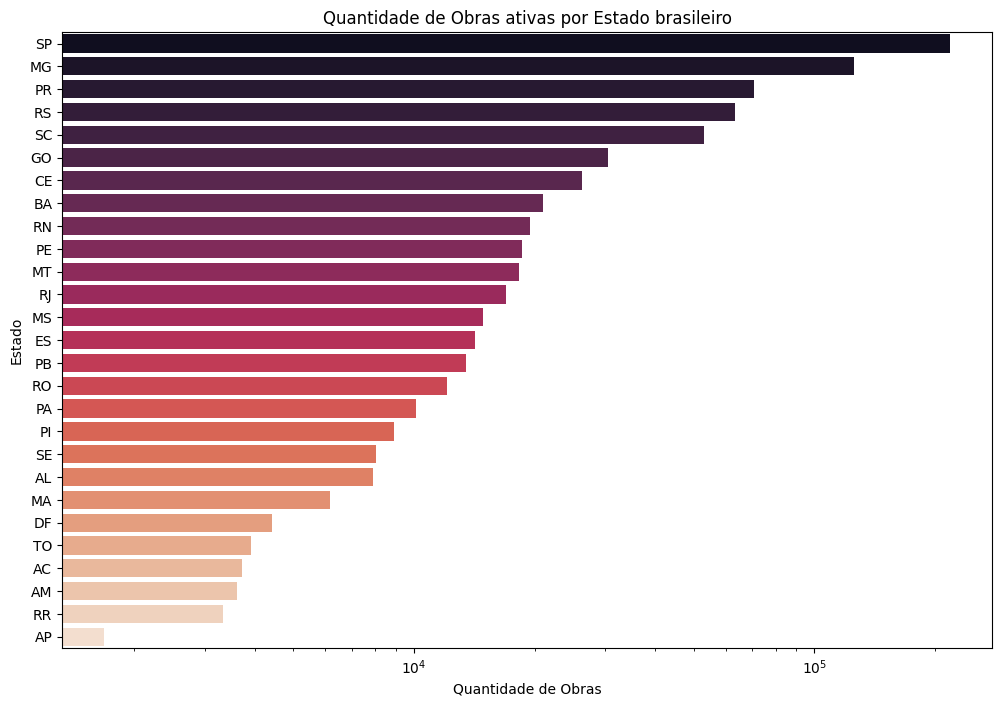

In [18]:
# Criando um gráfico de barras para visualizar os estados com mais obras em andamento no País
plt.figure(figsize=(12,8))

fig1 = sns.barplot(
    x = obras_estado['Quantidade de Obras'],
    y = obras_estado['Estado'],
    hue=obras_estado['Estado'],
    palette='rocket',
)

# Definições a respeito do gráfico
plt.title('Quantidade de Obras ativas por Estado brasileiro')
plt.xscale('log')
plt.show()

In [19]:
# Criando um dataFrame com as 25 cidades com mais obras no país
mascara = (df_cno['Situação'] == 2)
obras_municipio = df_cno.loc[mascara, ['Nome do município', 'Estado']].value_counts().reset_index()
obras_municipio.columns = ['Nome do município','Estado', 'Quantidade de Obras']

obras_municipio = obras_municipio.iloc[0:25,:].copy()

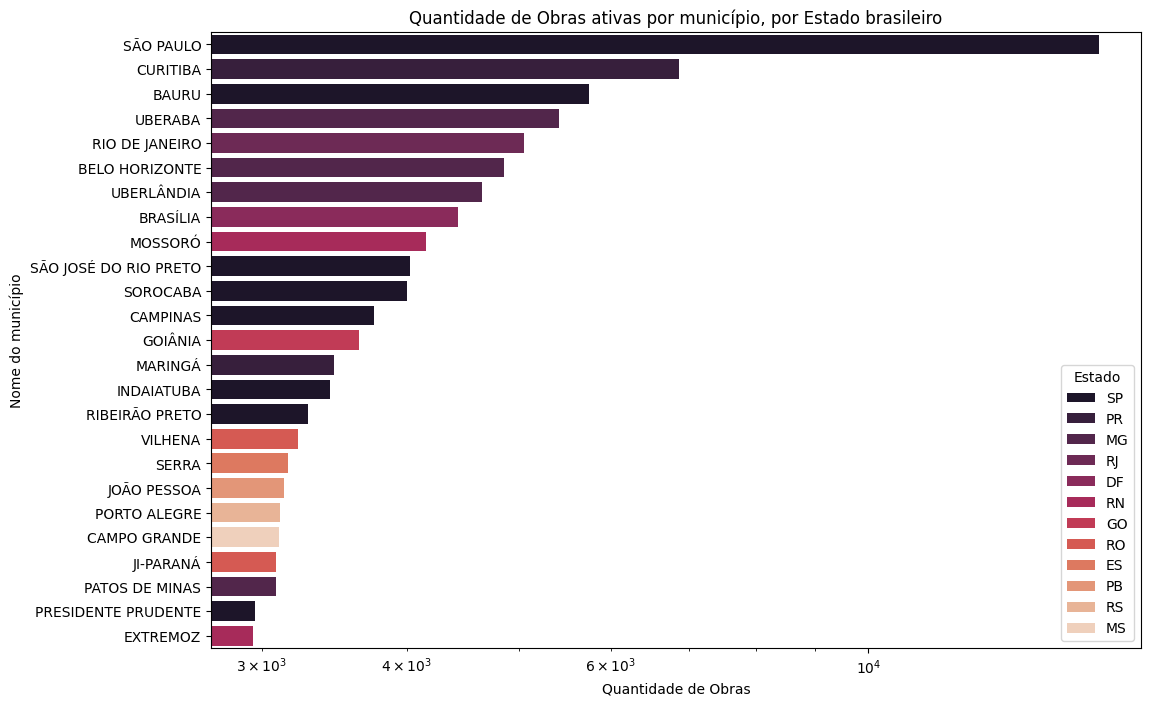

In [20]:
# Exibição das 25 cidades com mais obras no país
plt.figure(figsize=(12,8))

fig2 = sns.barplot(
    x = obras_municipio['Quantidade de Obras'],
    y = obras_municipio['Nome do município'],
    hue=obras_municipio['Estado'],
    palette='rocket',
)
plt.title('Quantidade de Obras ativas por município, por Estado brasileiro')
plt.xscale('log')
plt.show()

In [21]:
# Dentre as 5 cidades com maior número de obras, como está o comportamento de obras ativas desde 2016?
# para isso criei uma nova coluna com o Ano da Situação
df_cno['Ano da Situação'] = df_cno['Data da situação'].dt.year

In [22]:
# Filtrei apenas as obras com situação ativaas, cujo ano está entre 2016 e 2023.
filtro_ativas_ano = df_cno[(df_cno['Situação'] == 2) & (df_cno['Ano da Situação'] >= 2016) & (df_cno['Ano da Situação'] <= 2023)]
obras_ativas_ano = filtro_ativas_ano.groupby(['Estado','Ano da Situação','Nome do município']).size().reset_index(name='Numero de Obras')

In [23]:
# Como a visualização do gráfico ficou muito confusa no grafico de linhas, 
# resolvemos utilizar apenas os 5 Estados com maior número de Obras, para criar o gráfico,
# também vamos aplicar a escala logaritmica no eixo Y para melhorar ainda mais a visualização.

In [24]:
top_5_estados = obras_ativas_ano.groupby('Estado')['Numero de Obras'].sum().nlargest(5).index
obras_top5 = obras_ativas_ano[obras_ativas_ano['Estado'].isin(top_5_estados)].copy(deep=True)
obras_top5.drop('Nome do município', axis=1, inplace=True)

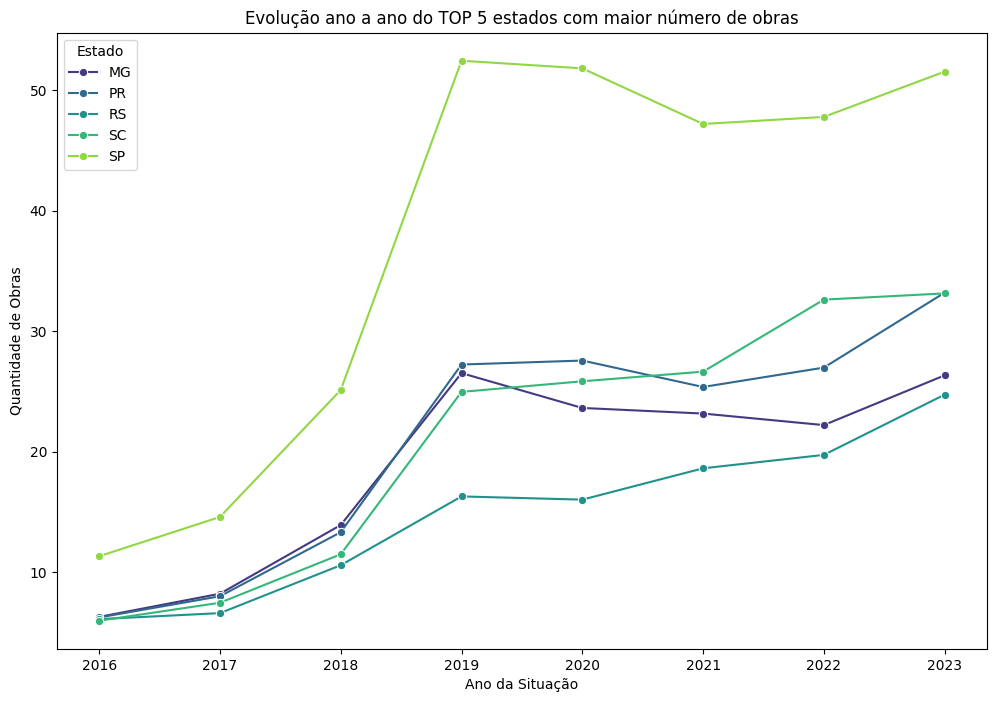

In [25]:
plt.figure(figsize=(12,8))
fig3 = sns.lineplot(
    data=obras_top5,
    x='Ano da Situação',
    y='Numero de Obras',
    hue='Estado',
    palette='viridis',
    errorbar=None,
    marker='o'
)

plt.title('Evolução ano a ano do TOP 5 estados com maior número de obras')
plt.xlabel('Ano da Situação')
plt.ylabel('Quantidade de Obras')
plt.show()

In [26]:
# Também é interessante visualizar os Estados com menor número de Obras em andamento, diante disso fiz um filtro
# para selecionar apenas os 5 Estados com menor número de obras ativas.

bot_5_estados = obras_ativas_ano.groupby('Estado')['Numero de Obras'].sum().nsmallest(5).index
obras_bot5 = obras_ativas_ano[obras_ativas_ano['Estado'].isin(bot_5_estados)].copy(deep=True)
obras_bot5.drop('Nome do município', axis=1, inplace=True)

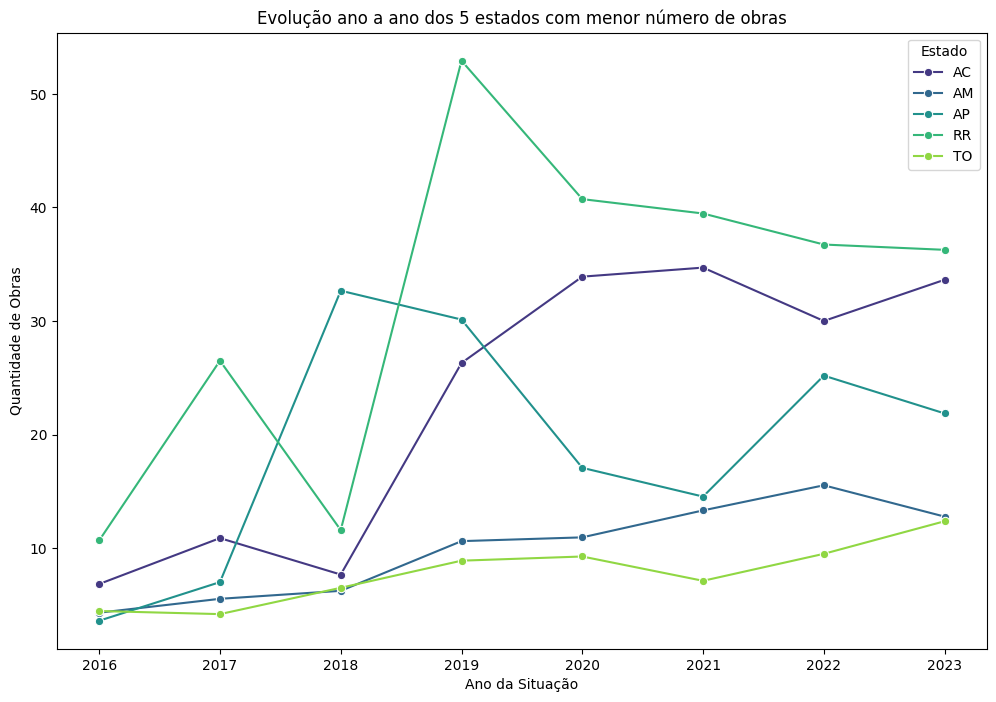

In [27]:
plt.figure(figsize=(12,8))
fig4 = sns.lineplot(
    data=obras_bot5,
    x='Ano da Situação',
    y='Numero de Obras',
    hue='Estado',
    palette='viridis',
    errorbar=None,
    marker='o'
)

plt.title('Evolução ano a ano dos 5 estados com menor número de obras')
plt.xlabel('Ano da Situação')
plt.ylabel('Quantidade de Obras')
plt.show()

In [28]:
# Quais são as 15 cidades que estão com numero de obras em crescimento em relação ao ano passado.
# Filtrar as obras por município, com quantidade de obras em cada ano.
df_ativas = df_cno[(df_cno['Situação'] == 2)].copy()

In [29]:
# Determinar o crescimento comparando com o ano anterior
# Adicionar a coluna 'Ano da Situação' se ainda não existir
df_ativas['Ano da Situação'] = df_ativas['Data da situação'].dt.year

# Filtrar os dados para o ano atual e o ano anterior
ano_atual = 2023
ano_anterior = ano_atual - 1

df_atual = df_ativas[df_ativas['Ano da Situação'] == ano_atual]
df_anterior = df_ativas[df_ativas['Ano da Situação'] == ano_anterior]

# Agrupar por cidade e contar o número de obras para cada ano
contagem_atual = df_atual.groupby(['Nome do município','Estado']).size().reset_index(name='Contagem_Atual')
contagem_anterior = df_anterior.groupby(['Nome do município', 'Estado']).size().reset_index(name='Contagem_Anterior')

# Juntar os dois dataframes para comparar as contagens
comparacao = pd.merge(contagem_anterior, contagem_atual, on=['Nome do município','Estado'], how='outer')

# Calcular a diferença no crescimento de obras entre os anos
comparacao['Crescimento'] = comparacao['Contagem_Atual'].fillna(0) - comparacao['Contagem_Anterior'].fillna(0)

# Selecionar as 15 cidades com o maior crescimento
top_15_crescimento = comparacao.nlargest(15, 'Crescimento')

# Se você quiser garantir que está considerando apenas as cidades com crescimento positivo, você pode adicionar:
top_15_crescimento = top_15_crescimento[top_15_crescimento['Crescimento'] > 0]

# Exibir os resultados
top_15_crescimento


,Nome do município,Estado,Contagem_Anterior,Contagem_Atual,Crescimento
4604,SÃO PAULO,SP,2902.0,3653.0,751.0
1560,EXTREMOZ,RN,253.0,645.0,392.0
2915,MOSSORÓ,RN,651.0,1018.0,367.0
4096,SANTA ROSA,RS,123.0,462.0,339.0
2382,JOÃO PESSOA,PB,394.0,703.0,309.0
1581,FEIRA DE SANTANA,BA,265.0,564.0,299.0
260,ARAPIRACA,AL,264.0,560.0,296.0
785,CALDAS NOVAS,GO,210.0,506.0,296.0
4436,SÃO GONÇALO DO AMARANTE,RN,150.0,401.0,251.0
4497,SÃO JOSÉ DO RIO PRETO,SP,517.0,730.0,213.0


In [30]:
# Representação do crescimento em percentual.
top_15_crescimento['Crescimento %'] = (top_15_crescimento['Crescimento'] / top_15_crescimento['Contagem_Anterior']) * 100

top_15_crescimento = top_15_crescimento.sort_values('Crescimento %', ascending=False)

In [31]:
top_15_crescimento['Cidade-UF'] = top_15_crescimento['Nome do município'] + '-' + top_15_crescimento['Estado']

top_15_crescimento

,Nome do município,Estado,Contagem_Anterior,Contagem_Atual,Crescimento,Crescimento %,Cidade-UF
4096,SANTA ROSA,RS,123.0,462.0,339.0,275.609756,SANTA ROSA-RS
4436,SÃO GONÇALO DO AMARANTE,RN,150.0,401.0,251.0,167.333333,SÃO GONÇALO DO AMARANTE-RN
1560,EXTREMOZ,RN,253.0,645.0,392.0,154.940711,EXTREMOZ-RN
785,CALDAS NOVAS,GO,210.0,506.0,296.0,140.952381,CALDAS NOVAS-GO
1581,FEIRA DE SANTANA,BA,265.0,564.0,299.0,112.830189,FEIRA DE SANTANA-BA
260,ARAPIRACA,AL,264.0,560.0,296.0,112.121212,ARAPIRACA-AL
2071,ITABAIANA,SE,133.0,268.0,135.0,101.503759,ITABAIANA-SE
2479,LAJEADO,RS,181.0,341.0,160.0,88.397790,LAJEADO-RS
2382,JOÃO PESSOA,PB,394.0,703.0,309.0,78.426396,JOÃO PESSOA-PB
2390,JUAZEIRO DO NORTE,CE,201.0,354.0,153.0,76.119403,JUAZEIRO DO NORTE-CE


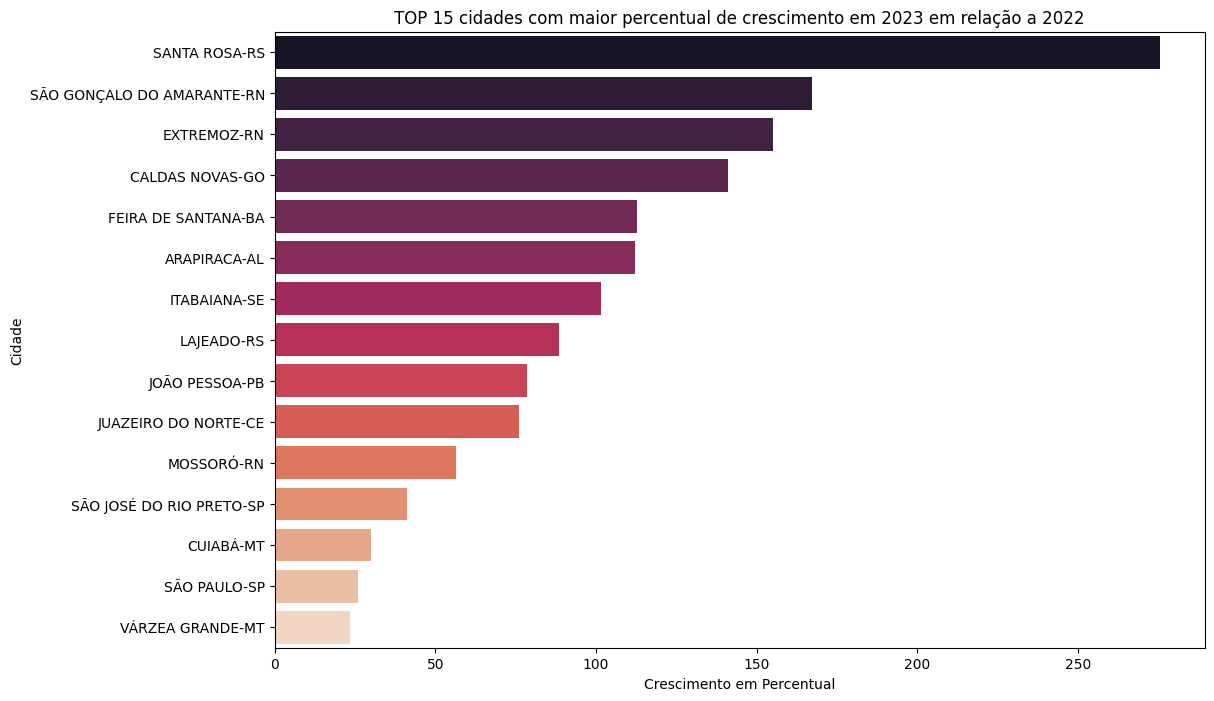

In [32]:
plt.figure(figsize=(12,8))
fig5 = sns.barplot(
    data=top_15_crescimento,
    x='Crescimento %',
    y='Cidade-UF',
    hue='Cidade-UF',
    palette='rocket'
)

plt.title('TOP 15 cidades com maior percentual de crescimento em 2023 em relação a 2022')
plt.ylabel('Cidade')
plt.xlabel('Crescimento em Percentual')

plt.show()

In [33]:
# quais as cidades e estados com obras de maior m².
# Qual a relação da área total da obra versus a quantidade de obras num determinado município?

df_cno['Cidade-UF'] = df_cno['Nome do município'] + '-' + df_cno['Estado']
obras_andamento = df_cno[(df_cno['Situação'].isin((2,3,14)))].copy()

In [34]:
agrupado = df_cno.groupby('Cidade-UF').agg({'Área total': 'sum', 'Nome do município': 'size'}).rename(columns={'Nome do município': 'Número de Obras'}).reset_index()

In [47]:
agrupado = agrupado.sort_values('Área total', ascending=False).reset_index()

In [48]:
agrupado = agrupado.drop(0, axis=0).reset_index(drop=True).copy()

In [49]:
# Gráfico de barras para representar as 15 cidades com maior m² de obras em andamento.
agrupado['Área total em Obras'] = round(agrupado['Número de Obras'] * agrupado['Área total'], 4)
agrupado = agrupado.sort_values('Área total', ascending=False).reset_index()
agrupado = agrupado.drop(0, axis=0).reset_index(drop=True).copy()
x = agrupado.groupby('Cidade-UF')['Área total em Obras'].sum().reset_index()
top15_area = x.sort_values('Área total em Obras', ascending=False).head(16)


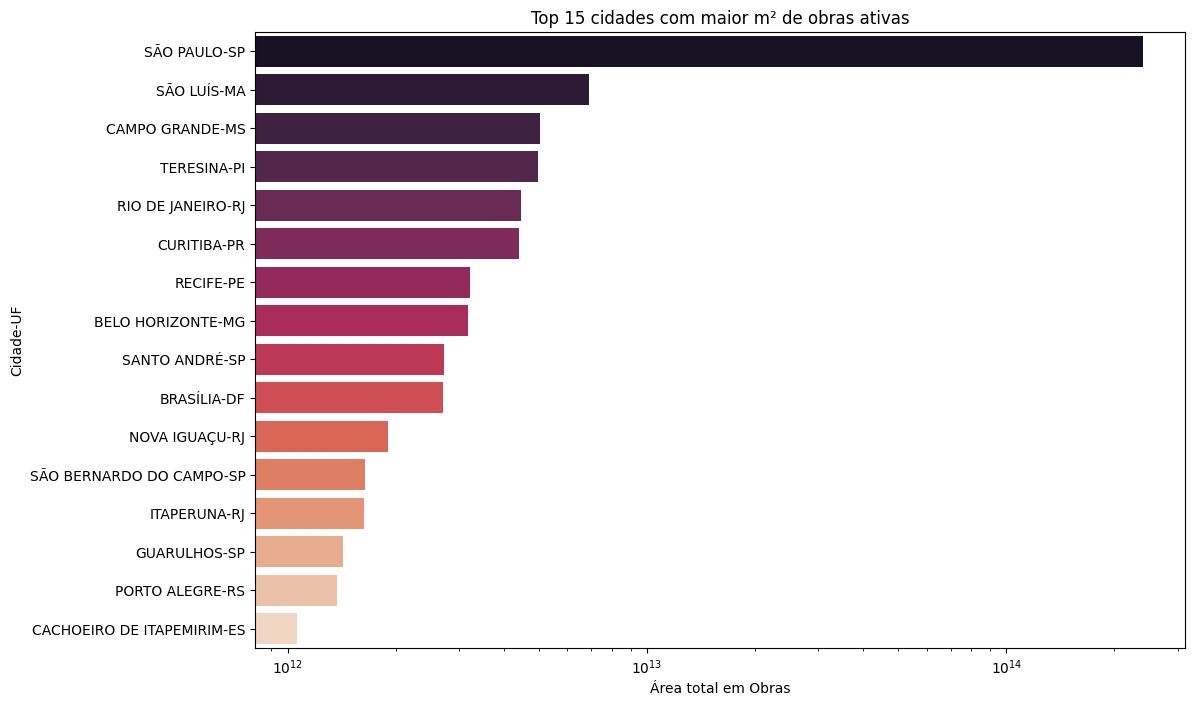

In [50]:
# Gráfico de barras para representar as 15 cidades com maior m² de obras em andamento.
plt.figure(figsize=(12,8))
fig6 = sns.barplot(
    data=top15_area,
    x='Área total em Obras',
    y='Cidade-UF',
    hue='Cidade-UF',
    palette='rocket'
)

plt.title('Top 15 cidades com maior m² de obras ativas')
plt.xscale('log')
plt.show()

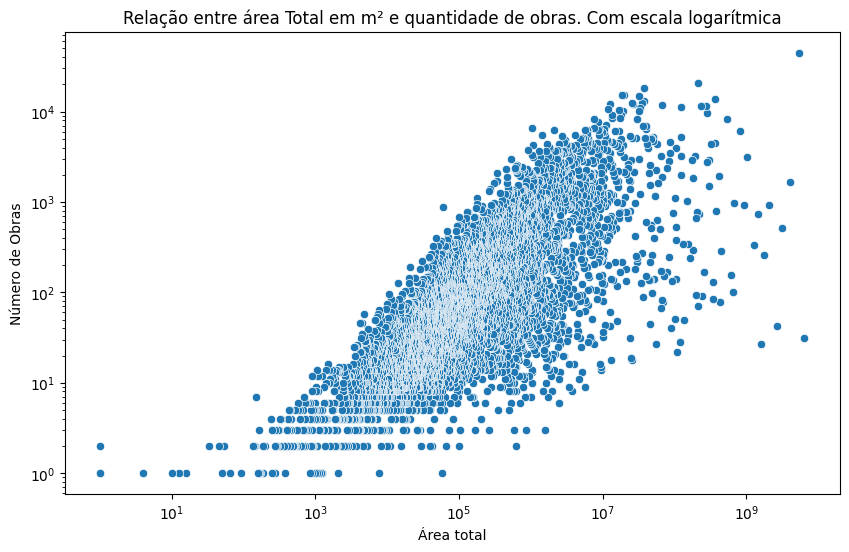

In [53]:
# Gráfico de dispersão para representar a relação entre quantidade de obras numa determinada cidade e a m² das obras.
plt.figure(figsize=(10,6))

fig7 = sns.scatterplot(
    data=agrupado,
    x='Área total',
    y='Número de Obras',
)
plt.title('Relação entre área Total em m² e quantidade de obras. Com escala logarítmica')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [54]:
df_cno.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219853 entries, 0 to 2219860
Data columns (total 28 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   CNO                                 int64         
 1   Código do Pais                      int64         
 2   Nome do pais                        object        
 3   Data de início                      datetime64[ns]
 4   Data de inicio da responsabilidade  datetime64[ns]
 5   Data de registro                    datetime64[ns]
 6   CNO vinculado                       float64       
 7   CEP                                 object        
 8   NI do responsável                   float64       
 9   Qualificação do responsavel         int64         
 10  Nome                                object        
 11  Código do municipio                 object        
 12  Nome do município                   object        
 13  Tipo de logradouro                  object     

In [58]:
df_filtro_ano2009 = df_cno[(df_cno['Ano da Situação'] > 2009)]


In [59]:
# Quanto representa (em percentual) cada situação de obras, como um todo.

situacao_contagem = df_filtro_ano2009['Situação'].replace(situation_mapping).value_counts()

situacao_porcentagem = situacao_contagem / situacao_contagem.sum() * 100

situacao_df = situacao_porcentagem.reset_index().rename(columns={'index': 'Situação', 'Situação': 'Porcentagem'})

situacao_df

,Porcentagem,count
0,ENCERRADA,59.837141
1,ATIVA,36.171745
2,PARALISADA,2.166356
3,NULA,1.560877
4,SUSPENSA,0.263881


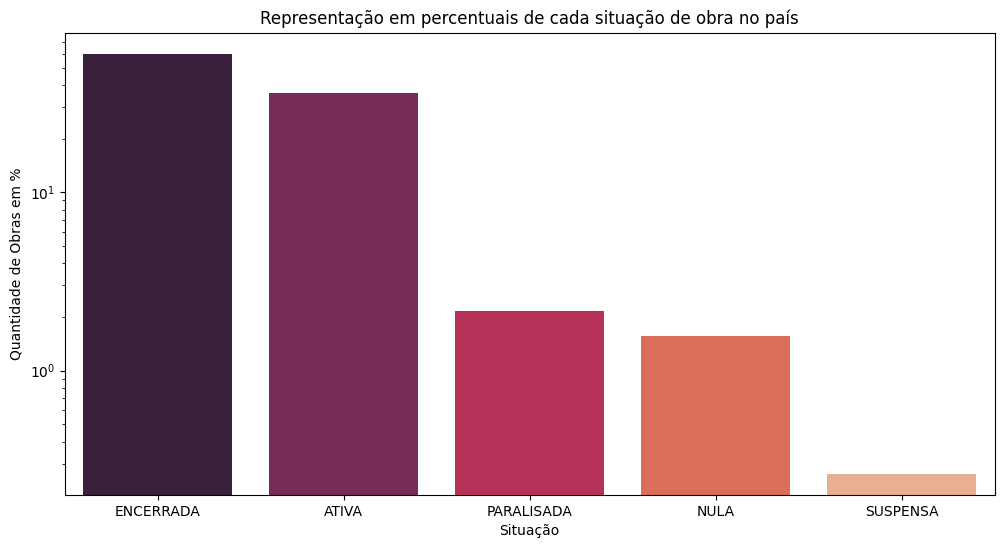

In [62]:
# Gráfico de barras para representar o percentual de cada situação condita no DataFrame
plt.figure(figsize=(12,6))
fig8 = sns.barplot(
    data=situacao_df,
    x='Porcentagem',
    y='count',
    hue='Porcentagem',
    palette='rocket'
)

plt.title('Representação em percentuais de cada situação de obra no país')
plt.ylabel('Quantidade de Obras em %')
plt.xlabel('Situação')
plt.yscale('log')
plt.show()

### Etapa 6: Conclusão e insights gerados.


Após uma análise exploratória detalhada do Cadastro Nacional de Obras (CNO), diversas observações e conclusões podem ser extraídas para orientar a estratégia de investimentos de uma empresa varejista no setor da construção civil. Esta análise foi fundamentada em dados extraídos diretamente do [Site Oficial Dados Gov.Br](https://dados.gov.br/dados/conjuntos-dados/cadastro-nacional-de-obras-cno), proporcionando uma base sólida para a tomada de decisões.

### Principais Conclusões:

1. **Distribuição Geográfica das Obras:** A análise revelou quais cidades e estados possuem maior número de obras em andamento, fornecendo um mapa claro das áreas com maior atividade de construção civil no país. Isso permite à empresa focar seus esforços e investimentos nas regiões mais promissoras.

2. **Dinâmica do Crescimento:** Foi possível identificar se as regiões com maior número de obras estão em fase de crescimento ou se já alcançaram um patamar de estagnação. Esse insight é crucial para decidir se vale a pena investir em áreas em expansão ou consolidar a presença em mercados já estabelecidos.

3. **Tendências Históricas:** A análise do comportamento de obras ativas desde 2016 nas cinco cidades com o maior número de obras forneceu uma perspectiva de longo prazo sobre o desenvolvimento do setor e ajudou a prever futuras tendências.

4. **Cidades em Ascensão:** Identificar as 15 cidades com número de obras em crescimento em relação ao ano anterior oferece à empresa a oportunidade de antecipar-se ao mercado, direcionando recursos para locais em ascensão antes que se tornem saturados.

5. **Relação Área versus Quantidade de Obras:** A análise da relação entre a área total da obra e a quantidade de obras em determinado município permite entender melhor como o espaço está sendo utilizado e quais tipos de projetos são mais prevalentes em diferentes regiões.

6. **Distribuição das Situações de Obras:** Compreender como as situações de obras (ativas, suspensas, paralisadas, encerradas) se distribuem percentualmente oferece uma visão geral da saúde do setor de construção civil e ajuda a avaliar os riscos associados a investimentos em diferentes áreas.

### Insights Gerados:

- **Oportunidades de Investimento:** As regiões identificadas com maior número de obras em andamento e aquelas em fase de crescimento representam oportunidades significativas de investimento para a empresa.
- **Estratégia de Diversificação:** A diversidade nas situações das obras sugere a necessidade de uma estratégia de investimento diversificada, que considere tanto projetos em áreas de crescimento quanto em mercados consolidados.
- **Foco em Cidades Emergentes:** As cidades em ascensão merecem atenção especial, pois podem oferecer retornos elevados sobre investimentos se abordadas estrategicamente antes de se tornarem focos de grande concorrência.
- **Ajuste de Portfólio de Produtos:** A análise da relação entre a área total da obra e a quantidade de obras pode informar a empresa sobre ajustes necessários em seu portfólio de produtos e serviços, para melhor atender às demandas específicas de cada região.

### Estratégia Recomendada:

Com base nas conclusões e insights gerados, recomenda-se que a empresa adote uma estratégia de investimento geograficamente direcionada, focando em regiões com alto volume de obras em andamento e em crescimento. Além disso, deve-se considerar a diversificação do portfólio para incluir produtos e serviços que atendam às necessidades específicas das áreas identificadas como emergentes ou em expansão. Acompanhar de perto a evolução das situações das obras permitirá ajustes ágeis na estratégia, garantindo que a empresa se mantenha competitiva e relevante no mercado de construção civil.

Esta análise oferece uma base sólida para a tomada de decisões informadas, apoiando a empresa na maximização de seus investimentos e no fortalecimento de sua posição no mercado de construção civil.